<a href="https://colab.research.google.com/github/SivEngOrn/Heart-Disease-Prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


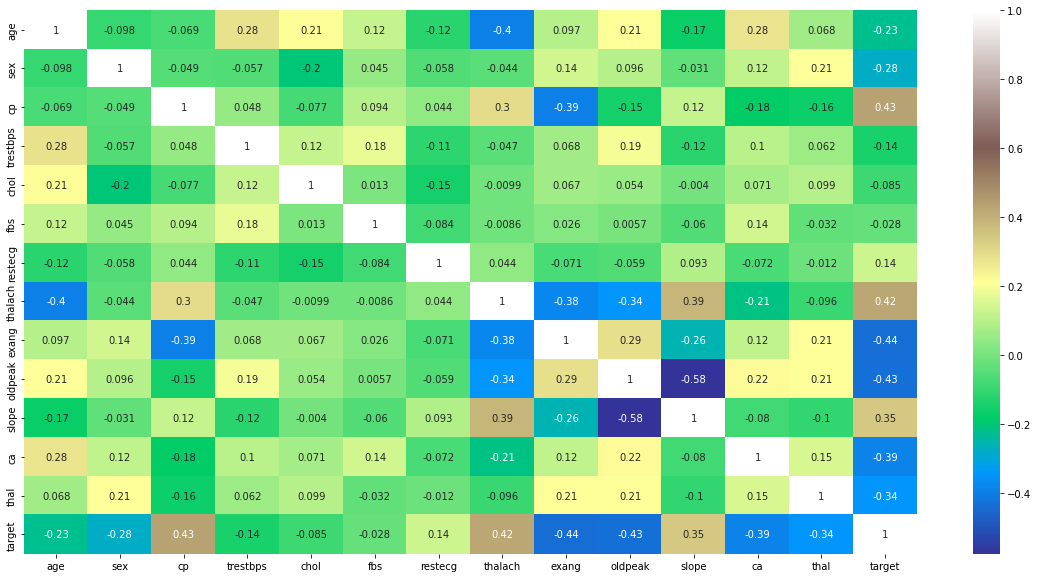

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

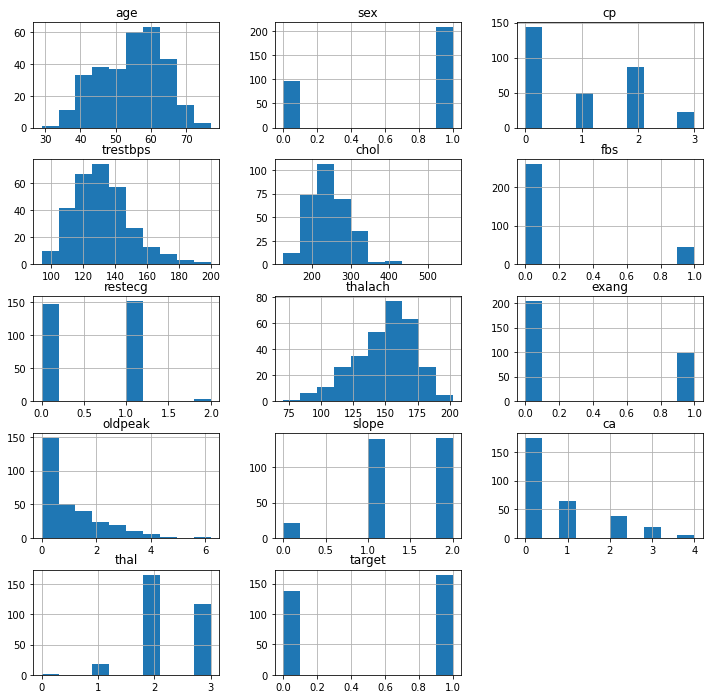

In [ ]:
df.hist(figsize=(12,12), layout=(5,3));

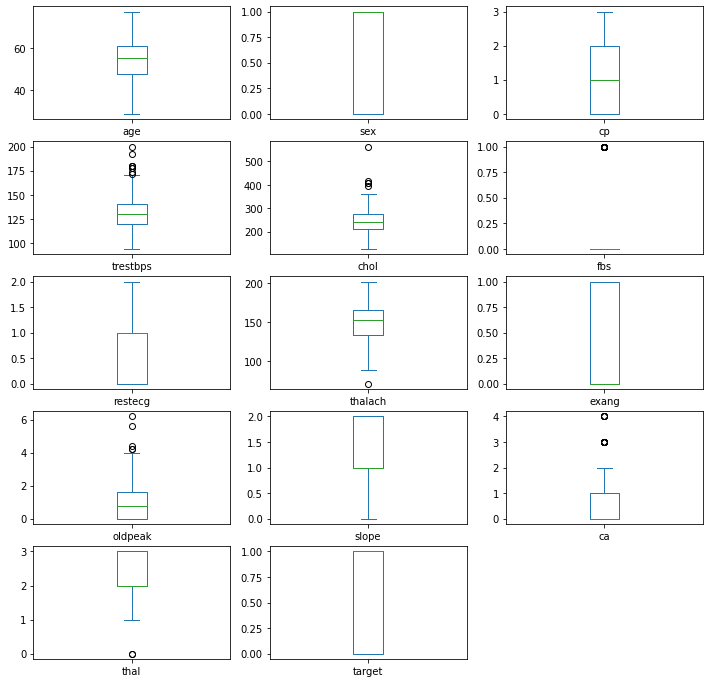

In [ ]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

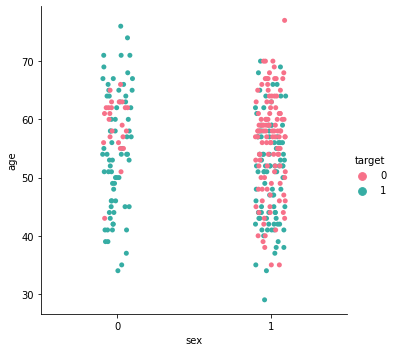

In [ ]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')

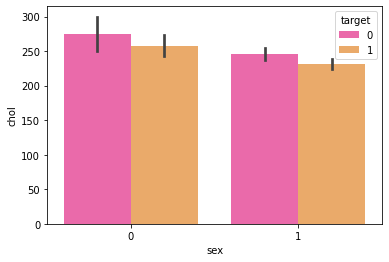

In [ ]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

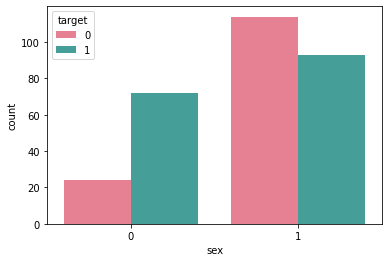

In [ ]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

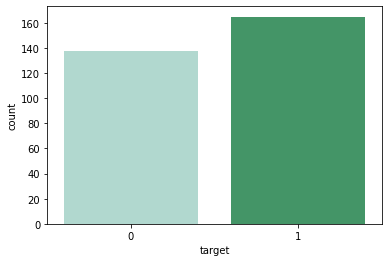

In [ ]:
sns.countplot(x='target',palette='BuGn', data=df)

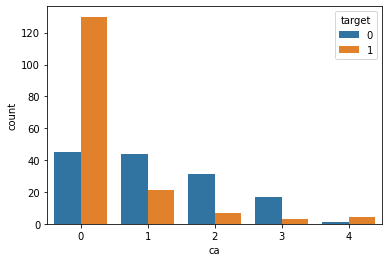

In [ ]:
sns.countplot(x='ca',hue='target',data=df)

In [ ]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

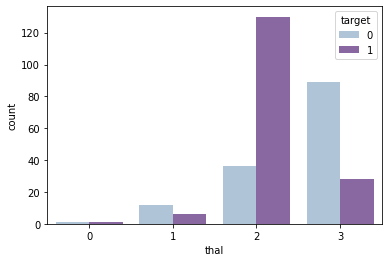

In [ ]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

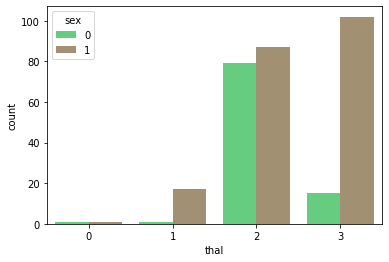

In [ ]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

In [ ]:
df['cp'].value_counts()  # chest pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

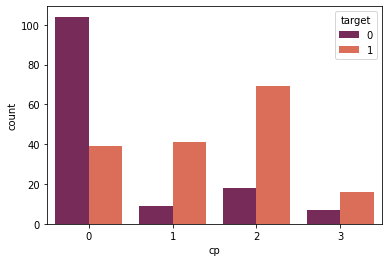

In [ ]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

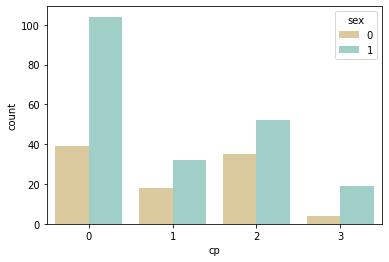

In [ ]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

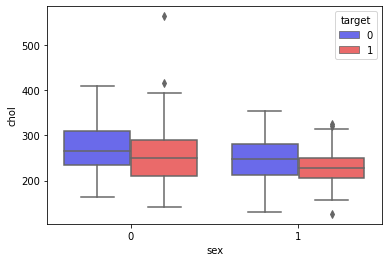

In [ ]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

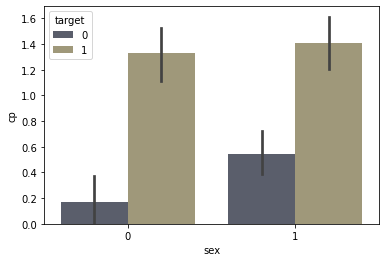

In [ ]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

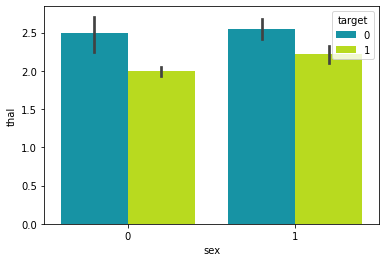

In [ ]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')

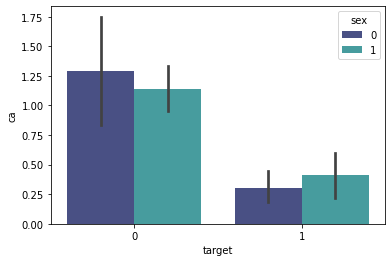

In [ ]:
sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')

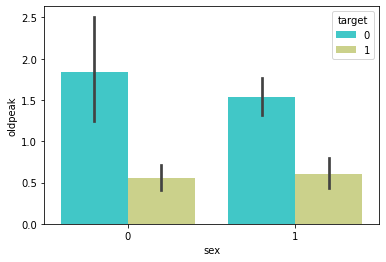

In [ ]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)

In [ ]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

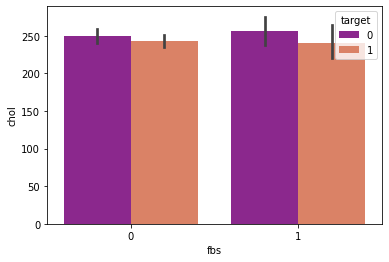

In [ ]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

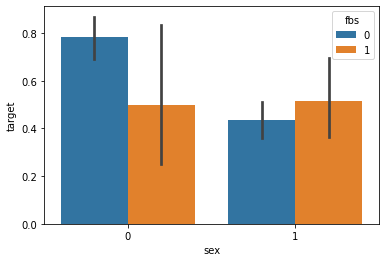

In [ ]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

In [ ]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


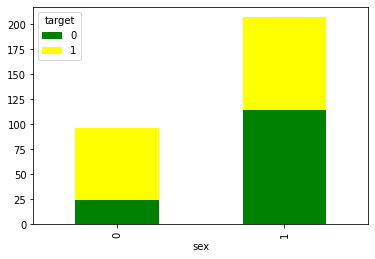

In [ ]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [ ]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


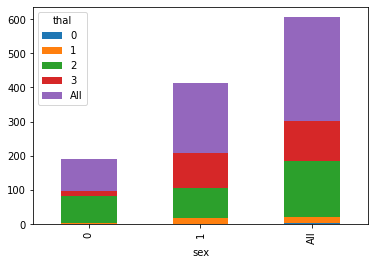

In [ ]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [ ]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,1,12,36,89,138
1,1,6,130,28,165
All,2,18,166,117,303


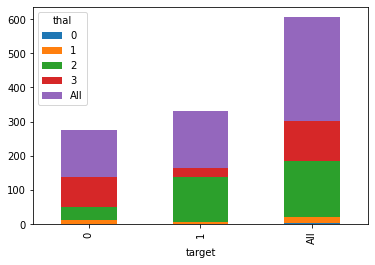

In [ ]:
temp.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


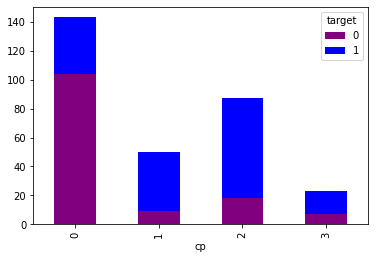

In [ ]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler  
RobustScaler = RobustScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = RobustScaler.fit_transform(df[columns_to_scale])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2,1
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2,1
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2,1
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2,1


In [ ]:
X= df.drop(['target'], axis=1)
y= df['target']

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [ ]:
print('X_train-', X_train.shape)
print('X_test-',X_test.shape)
print('y_train-', y_train.shape)
print('y_test-', y_test.shape)

X_train- (242, 13)
X_test- (61, 13)
y_train- (242,)
y_test- (61,)


In [ ]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 3146
X_test- 793
y_train- 242
y_test- 61


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [ ]:
accuracy_score(y_test, prediction1)

0.9016393442622951

# Tuning the Hyperparameters of the Model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

model1=LogisticRegression()

# parameters
parameters = {'penalty':['l2'], 'C':[1.0, 10.0, 100.0, 1000.0]}
#define search
clf = GridSearchCV(model1, parameters, verbose=2)
# execute search
clf.fit(X_train, y_train)

#Best parameters for Logistic Regression
logreg_best_param = clf.best_params_
print("Best params for LR:", logreg_best_param)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   0.0s
[CV] END .................................C=10.0, penalty=l2; total time=   0.0s
[CV] END ................................C=100.0, penalty=l2; total time=   0.0s
[CV] END ................................C=100.0,

In [ ]:
predict = clf.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



In [ ]:
print(confusion_matrix(y_test, predict))

[[21  5]
 [ 1 34]]


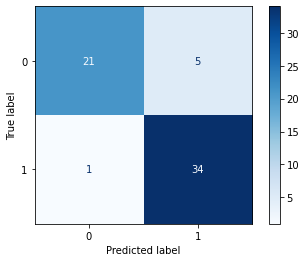

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Best accuracy for Logistic Regression

In [ ]:
logreg_accuracy_score = accuracy_score(y_test, predict)
print("Best accuracy for LR:", logreg_accuracy_score)

Best accuracy for LR: 0.9016393442622951


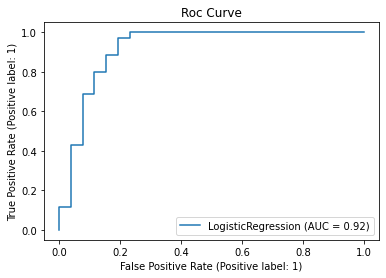

In [ ]:
from sklearn.metrics import recall_score, plot_roc_curve
plot_roc_curve(lr, X_test, y_test);
plt.title('Roc Curve');

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model2 = KNN.fit(X_train, y_train)
prediction2 = model2.predict(X_test)

In [ ]:
accuracy_score(y_test, prediction2)

0.8852459016393442

K Neighbors Classifier ML model. Used Grid Seach for finding best parameters, best accuracy

In [ ]:
parameters = {
    'n_neighbors' : [3,5,11,17],
    'weights' :['uniform', 'distance']
   }

model = KNeighborsClassifier()
clf2 = GridSearchCV(model, parameters, verbose=2)
clf2.fit(X_train, y_train)
KN_best_param = clf2.best_params_
print("Best params for KN:", KN_best_param)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weig

In [ ]:
predict = clf2.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.87      0.94      0.90        35

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [ ]:
print(confusion_matrix(y_test, predict))

[[21  5]
 [ 2 33]]


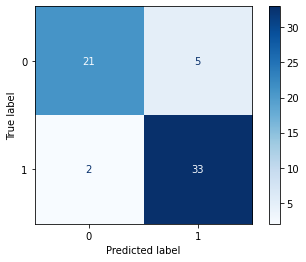

In [ ]:
plot_confusion_matrix(clf2, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Best accuracy for K Neighbors Classifier


In [ ]:
KN_accuracy_score = accuracy_score(y_test, predict)
print("Best accuracy for KN:", KN_accuracy_score)

Best accuracy for KN: 0.8852459016393442


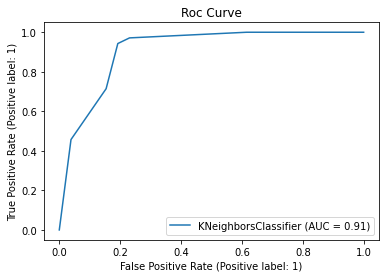

In [ ]:
from sklearn.metrics import recall_score, plot_roc_curve
plot_roc_curve(KNN, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_train)
    prec = metrics.precision_score(y_test, y_train)
    rec = metrics.recall_score(y_test, y_train)
    f1 = metrics.f1_score(y_test, y_train)
    kappa = metrics.cohen_kappa_score(y_test, y_train)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_train)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

ValueError: ignored

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model3=dtc.fit(X_train,y_train)
prediction3=model3.predict(X_test)

In [ ]:
accuracy_score(y_test,prediction3)

0.7213114754098361

Decision Tree Classifier ML model. Used Grid Seach for finding best parameters, best accuracy

In [ ]:
parameters = {
    'max_depth' : [None,4,5,6,7],
    'criterion' :['gini', 'entropy']
   }

model3 = DecisionTreeClassifier()
clf = GridSearchCV(model3, parameters, verbose=2)
clf.fit(X_train, y_train)

DTC_best_param = clf.best_params_
print("Best params for DTC:", DTC_best_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini,

In [ ]:
predict = clf.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.66      0.81      0.72        26
           1       0.83      0.69      0.75        35

    accuracy                           0.74        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.75      0.74      0.74        61



In [ ]:
print(confusion_matrix(y_test, predict))

[[21  5]
 [11 24]]


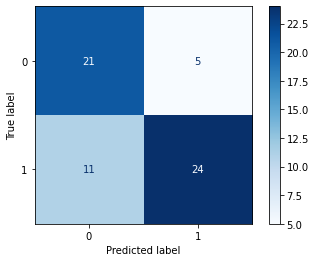

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Best accuracy for Decision Tree Classifier

In [ ]:
DTC_accuracy_score = accuracy_score(y_test, predict)
print("Best accuracy for DTC:", DTC_accuracy_score)

Best accuracy for DTC: 0.7377049180327869


##Accuracy Data Frame

In [ ]:
accuracy_frame = pd.DataFrame({'Model': [
                                   'Logistic Regression',
                                   'K-Nearest Neighbour Classifier'], 
                         'Accuracy': [
                                      logreg_accuracy_score*100,
                                     KN_accuracy_score*100,
]})
accuracy_frame

,Model,Accuracy
0,Logistic Regression,90.163934
1,K-Nearest Neighbour Classifier,88.524590


TypeError: ignored

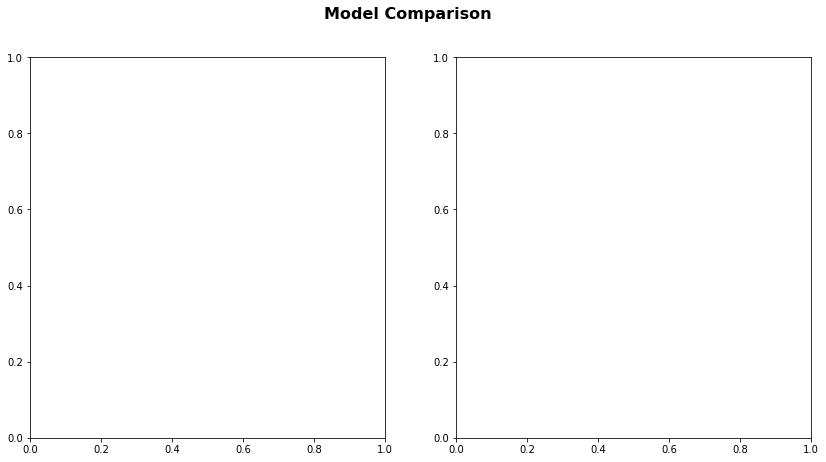

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')


# Second plot
## Comparing ROC Curve
ax2.plot(clf['fpr'], clf['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(clf['auc']))
ax2.plot(clf2['fpr'], clf2['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(clf2['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()